# Name: Aparna A

# Task 1 : Prediction using Supervised ML

#### In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves only two variables.

In [2]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading data from online source

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

### Data Exploration

In [35]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [37]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

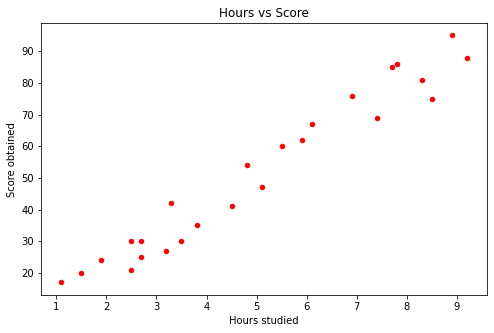

In [7]:
#visualising with scatter plot

data.plot(kind='scatter',x='Hours',y='Scores',color='r',figsize=(8,5))
plt.title('Hours vs Score')
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.show()

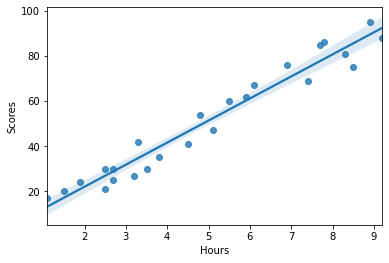

In [8]:
sns.regplot(x="Hours", y="Scores",data=data)

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and score obtained. So it can be solved by Linear Regression.

### Preparing the data

In [10]:
data.shape

(25, 2)

In [11]:
25/3

8.333333333333334

Here we take 1/3rd of data as test data and 2/3rd of data as training data

In [13]:
#training data
train=data.iloc[0:17]
test=data.iloc[17:25]

In [15]:
xtrain=train.drop('Scores',axis=1)
ytrain=train['Scores']

In [25]:
xtest=test.drop('Scores',axis=1)
ytest=test['Scores']

 ### Training the Algorithm

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [27]:
print(xtest)

    Hours
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [28]:
print(ytest)

17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [29]:
#predicting the test set results

ypredict=model.predict(xtest)

In [30]:
ypredict

array([20.53555036, 60.98054463, 73.49923333, 28.23935879, 48.46185593,
       38.83209539, 68.68435306, 77.35113755])

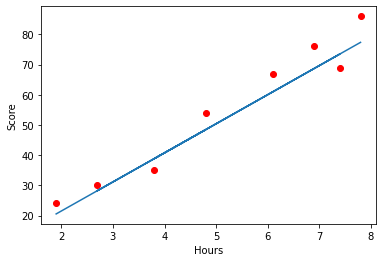

In [31]:
#plotting the test data using previously trained data
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,model.predict(xtest))
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

### Evaluation of the Model

In [32]:
#using matrices to find the mean absolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

ypredict=model.predict(xtest)
print("Mean absolute error:",format(metrics.mean_absolute_error(ypredict,ytest)))
print("R2-score: %.2f" % r2_score(ypredict,ytest))

Mean absolute error: 5.134816050181712
R2-score: 0.92


Here the R square value is high and root mean square error is low. So we can conclude that model is good.

In [33]:
#Comparing the actual vs predicted

df = pd.DataFrame({'Actual': ytest,'Predicted': ypredict})
df

,Actual,Predicted
17,24,20.535550
18,67,60.980545
19,69,73.499233
20,30,28.239359
21,54,48.461856
22,35,38.832095
23,76,68.684353
24,86,77.351138


### Predicted score if a student studies for 9.25 hrs/ day

In [38]:
hours=9.25
predicted_score=model.predict([[hours]])

print(f'No. of hours = {hours}')
print(f'Predicted Score = {predicted_score[0]}')


No. of hours = 9.25
Predicted Score = 91.3142903370339
